<a href="https://colab.research.google.com/github/sumi-2496/sumiakter/blob/main/Flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
classifier.trainable=False

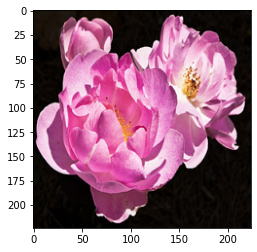

In [ ]:

image=Image.open("/content/gdrive/MyDrive/Flower classification/flower_photos/roses/14573732424_1bb91e2e42_n.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)

In [ ]:
flower=np.array(image)/255
flower=flower[np.newaxis, ...]

result=classifier.predict(flower)
Max_result=np.argmax(result)

image_lables=[]
with open("/content/gdrive/MyDrive/Flower classification/flower_photos/LICENSE.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

'dandelion/3584415133_a4122ab7b9.jpg CC-BY by Erlend Schei - https://www.flickr.com/photos/nerdegutt/3584415133/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

flower_folder=r"/content/gdrive/MyDrive/Flower classification/flower_photos"
catagories=['daisy','dandelion','roses','sunflowers','tulips',]

In [ ]:
data=[]
for Catagories in catagories:
  Folder=os.path.join(flower_folder,Catagories)
  label=catagories.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    image_arr=cv2.imread(image)
    image_arr=cv2.resize(image_arr,IMAGE_SHAPE)
    data.append([image_arr,label])


In [ ]:
data

In [ ]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.20784314, 0.19215686, 0.17254902],
         [0.18039216, 0.19215686, 0.16078431],
         [0.2745098 , 0.31372549, 0.28627451]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.16470588, 0.14901961, 0.12941176],
         [0.14509804, 0.14117647, 0.12156863],
         [0.21960784, 0.24313725, 0.21568627]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.16078431, 0.14509804, 0.13333333],
         [0.16078431, 0.14509804, 0.12941176],
         [0.18039216, 0.18039216, 0.14901961]],

        ...,

        [[0.06666667, 0.09019608, 0.09803922],
         [0.08627451, 0.11764706, 0.12941176]

# New Section

In [ ]:
x.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE+(3,),
    trainable=False
)

In [ ]:
number_of_flower=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_flower)          
])
model.summary()

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(x_train,y_train,epochs=5)

In [ ]:
model.evaluate(x_test,y_test)